# Actividad Evaluada 2
# Agustín Urrutia
## Enunciado

En esta actividad vamos a trabajar con los mismos datos de la actividad de la semana pasada. Estos datos son los que representan un caso ficticio de una tienda online que vende frutas. Las tablas disponibilizadas son `Usuarios`, `Frutas` y `Compras`, y las puedes encontrar en el GitHub junto a este archivo. Recordemos que las compras disponibles en los datos son solo para el mes de febrero.

Para esta actividad vas a tener que hacer consultas sobre estos datos en BigQuery y vas a tener que descargar los resultados en formato `.csv`. Luego vas a tener que cargar los archivos `.csv` (probablemente quieras usar Pandas 🐼🐼) para hacer ciertas visualizaciones.

Cuando te toque escribir una consulta SQL, te recomendamos usar Markdown y utilizar el highlighting de SQL como se muestra a continuación:

```SQL
SELECT * 
FROM Example E
WHERE E.id=1024
```

**Ojo**: lo más importante de esta actividad es que aprendas a usar BigQuery y Window Functions, por lo que esperamos que tus consultas SQL sean correctas y sigan buenas prácticas. Además, cuando te toque hacer una visualización, esperamos que no cumplas solo con lo mínimo, sino que buscamos que te sientas orgulloso del resultado que estás mostrando.

In [1]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Parte 1 (1 punto) - Validando los datos

Cuando estamos consumiendo datos de un Data Warehouse puede pasar que los datos no sean consistentes. Por lo mismo, es una buena práctica validar que nuestros datos son correctos. En esta actividad, vas a tener que validar algunas restricciones relacionadas a las compras.

- **Pregunta 1.1 (0.3 pts)**. Escribe una consulta SQL que compruebe que todo usuario y toda fruta que aparece en la tabla `Compras`  exista en las tablas `Frutas` y `Usuarios`.
- **Pregunta 1.2 (0.3 pts)**. Escribe una consulta SQL que compruebe que cada compra está asociada a un único usuario.
- **Pregunta 1.3 (0.4 pts)**. Escribe una consulta SQL que compruebe que un producto aparece una única vez en cada compra. Es decir, si existe una tupla que dice que un usuario compro la fruta $f$ en la compra $c$, entonces no hay otra tupla de la compra $c$ que tenga ese mismo producto.

### Pregunta 1.1 parte a

```SQL
SELECT C.id_producto
FROM 
  `IIC2440_actividad2.datos_compras` as C,
  `IIC2440_actividad2.datos_frutas` as F
WHERE
  C.id_producto NOT IN (
    SELECT F.id
    FROM `IIC2440_actividad2.datos_frutas` as F
  )
```
`No hay datos para mostrar.`

----------------------------------------------------------------------------------------------------------------------------

### Pregunta 1.1 parte b

```SQL
SELECT 
  C.id_usuario
FROM 
  `IIC2440_actividad2.datos_compras` as C,
  `IIC2440_actividad2.datos_usuarios` as U
WHERE
  C.id_usuario NOT IN (
    SELECT U.id
    FROM `IIC2440_actividad2.datos_usuarios` as U
  )
```
`No hay datos para mostrar.`

----------------------------------------------------------------------------------------------------------------------------

### Pregunta 1.2

```SQL
SELECT C.* 
FROM 
  `IIC2440_actividad2.datos_compras` AS C,
  `IIC2440_actividad2.datos_usuarios` as U,
  `IIC2440_actividad2.datos_usuarios` as U1
WHERE
  C.id_usuario = U.id
  AND U1.id = C.id_usuario
  AND U.id != U1.id
```
`No hay datos para mostrar.`

----------------------------------------------------------------------------------------------------------------------------

<!-- -- select * 
-- FROM
--   -- No duplicated row
--   (SELECT * 
--   FROM 
--     `IIC2440_actividad2.datos_compras` as C1,
--     `IIC2440_actividad2.datos_compras` as C2
--   WHERE
--     C1.id_compra = C2.id_compra
--     AND
--       C1.id_producto = C2.id_producto
--     AND 
--       C1.cantidad != C2.cantidad
--   ) as dif,
--   -- Duplication
--   (
--     SELECT COUNT(*) 
--     FROM `IIC2440_actividad2.datos_compras` as C
--     GROUP BY C.id_producto
--     HAVING COUNT(*) > 1
--   ) -->
### Pregunta 1.3

```SQL
SELECT count(C.id_compra)
FROM 
  `IIC2440_actividad2.datos_compras` as C
GROUP BY C.id_compra, C.id_producto
HAVING COUNT(C.id_compra) != 1
```
`No hay datos para mostrar.`


## Parte 2 (2 puntos) - Visualizando datos generales

Ahora vamos a construir algunas visualizaciones en base a los resultados de ciertas consultas en BigQuery.

- **Pregunta 2.1 (1 pto)**. Escribe una consulta en SQL que diga para cada fruta el número de veces que fue comprada. Luego, descarga el `.csv` de la respuesta y cárgalo en este notebook. Haz una visualización del resultado.
- **Pregunta 2.2 (1 pto)**. Escribe una consulta SQL que calcule el total de ventas diario en dinero ($), para cada día de febrero. Luego, descarga el `.csv` de la respuesta y cárgalo en este notebook. Haz una visualización del resultado.

### Pregunta 2.1

```SQL
SELECT DISTINCT
  C.id_producto,
  F.nombre,
  SUM(C.cantidad) OVER (
    PARTITION BY C.id_producto
  ) as fruta_comprada
FROM 
  `IIC2440_actividad2.datos_frutas` as F,
  `IIC2440_actividad2.datos_compras` as C
WHERE
  C.id_producto = F.id
ORDER BY 
  C.id_producto ASC
```

In [4]:
### En Colab. Cambiar ruta para encontrar archivo en cuestión
# file_path = "/content/drive/MyDrive/" + "Universidad/Procesamiento de Datos Masivos/Actividad 4/producto-cantidad.csv"
# data1 = pd.read_csv(file_path)

### En local con la carpeta tal como se entregó en el zip
data1 = pd.read_csv('producto-cantidad.csv')

print(data1.head())

   id_producto     nombre  fruta_comprada
0           11      Mango              96
1            8    Durazno             107
2           10  Guanábana             107
3            3        Uva             110
4            2       Pera             111


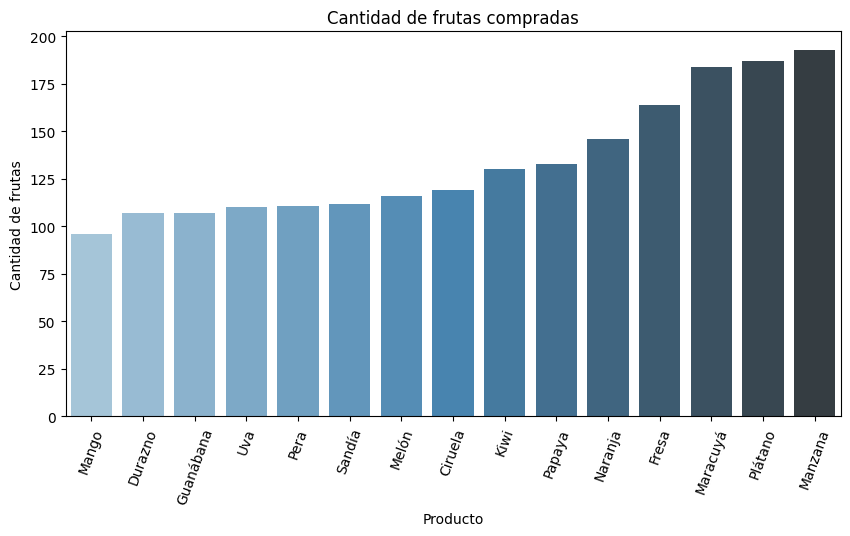

In [5]:
sns.barplot(x='nombre', y='fruta_comprada', data=data1, palette='Blues_d', width=0.8)
plt.xticks(rotation=70)
plt.gcf().set_size_inches(10, 5)
plt.title('Cantidad de frutas compradas')
plt.xlabel('Producto')
plt.ylabel('Cantidad de frutas')
plt.show()


Conversando con un amigo, me bajó la duda de si era la cantidad de veces que se compró una fruta o la cantidad de compras en la que se compró aquella fruta. Por lo tanto, se deja el segundo grafico también:

```SQL
SELECT DISTINCT
  nombre,
  COUNT(id_compra) OVER (
    PARTITION BY id_producto
  ) as veces_comprado
FROM
  `IIC2440_actividad2.datos_compras` 
  LEFT JOIN `IIC2440_actividad2.datos_frutas` ON  id_producto = id 
ORDER BY veces_comprado ASC
```


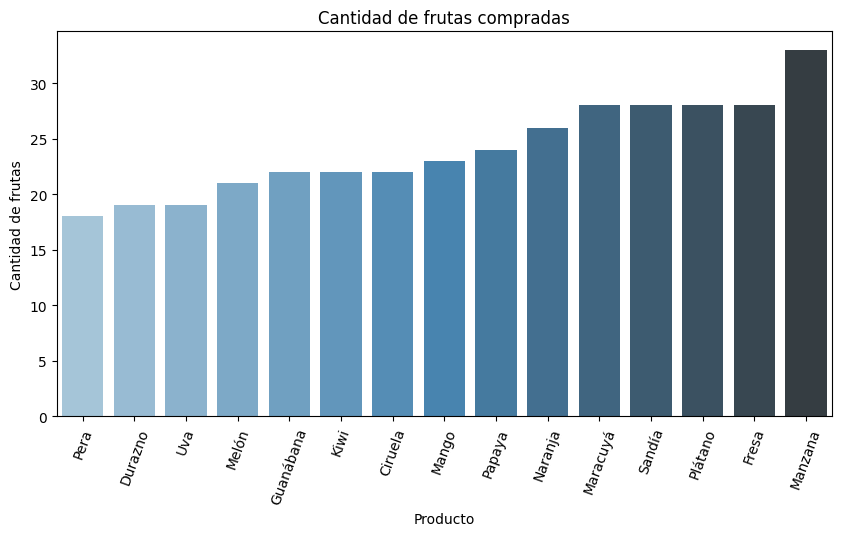

In [3]:
data1_2 = pd.read_csv('cantidad_de_veces_comprado.csv')
sns.barplot(x='nombre', y='veces_comprado', data=data1_2, palette='Blues_d', width=0.8)
plt.xticks(rotation=70)
plt.gcf().set_size_inches(10, 5)
plt.title('Cantidad de frutas compradas')
plt.xlabel('Producto')
plt.ylabel('Cantidad de frutas')
plt.show()

### Pregunta 2.2

```SQL
SELECT DISTINCT
  C.fecha_compra,
  SUM(F.precio_unitario * C.cantidad) OVER (PARTITION BY C.fecha_compra) AS costo_total
FROM 
  `IIC2440_actividad2.datos_compras` as C
JOIN `IIC2440_actividad2.datos_frutas` as F ON C.id_producto=F.id
ORDER BY C.fecha_compra
```

In [ ]:
data2 = pd.read_csv('fecha-venta.csv')
print(data2.head())

  fecha_compra  costo_total
0   2023-02-01          942
1   2023-02-02         1880
2   2023-02-03         1675
3   2023-02-04         1566
4   2023-02-05         1746


In [ ]:
# Solo para que se vea mejor el ploteo, se cambia la fecha completa por solo el día
data2['fecha_compra'] = pd.to_datetime(data2['fecha_compra']).dt.day

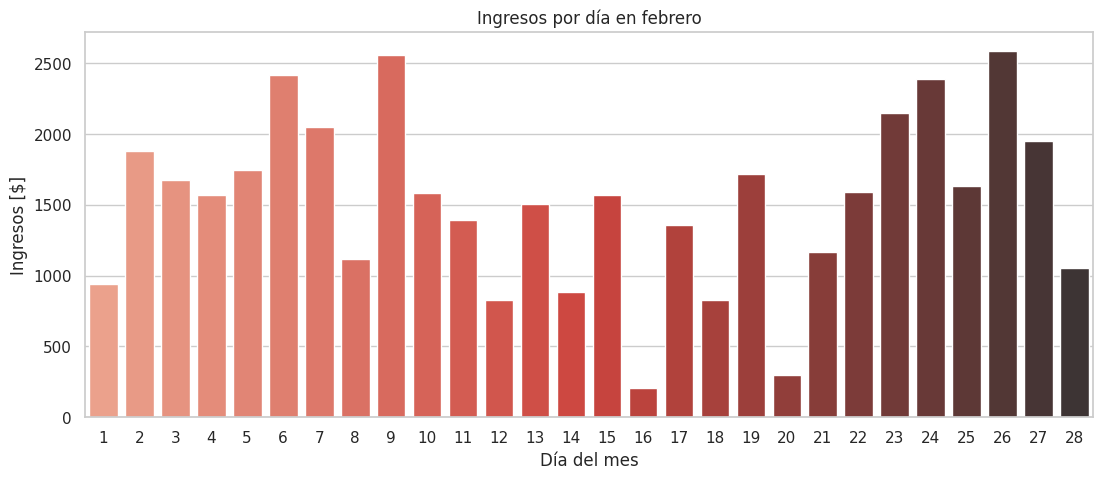

In [ ]:

sns.barplot(x='fecha_compra', y='costo_total', data=data2, width=0.8, palette='Reds_d')
plt.gcf().set_size_inches(13, 5)
plt.title('Ingresos por día en febrero')
plt.xlabel('Día del mes')
plt.ylabel('Ingresos [$]')
plt.show()


## Parte 3 (3 puntos) - Window Functions

Ahora vamos a construir algunas visualizaciones en base a los resultados de ciertas consultas en BigQuery que se responden utilizando Window Functions. **Importante**: si bien las consultas podríamos hacerlas sin usar Window Functions, la idea es que las resuelvas usando esta técnica porque es la forma más eficiente de calcular sumas acumuladas, medias móviles, entre otras tareas.

- **Pregunta 3.1 (0.5 pts)**. Escribe una consulta SQL que diga el nombre del usuario que gasto más plata en la tienda para cada día. En caso de empate, resuelvelo como estimes conveniente. Entrega la consulta SQL escrita en Markdown.
- **Pregunta 3.2 (1.5 pts)**. Escribe una consulta SQL que calcule la suma acumulada del total de dinero gastado de forma diaria por cada usuario. La idea es entender la evolución en el tiempo de lo que ha gastado cada usuario. Luego, descarga el `.csv` con el resultado y cárgalo en este notebook. Ahora haz una visualización del dinero gastado en el tiempo para un usuario en particular. La visualización debe estar hecha de manera tal que sea fácil escoger un usuario y ver el gráfico para ese usuario. **Hint**. Primero calcula el total diario gastado por un usuario. Luego haz un `LEFT JOIN` entre las fechas del mes de febrero y el total diario gastado por los usuarios. Finalmente haz una Window Function que haga el acumulado diario para cada usuario.
- **Pregunta 3.3 (1 pto)** Haz una consulta SQL que calcule la media móvil del total de ventas para cada día de febrero. La ventana debe considerar desde dos días en el pasado hasta dos días en el futuro. Luego descarga el `.csv` con la consulta, cárgalo en este notebook y realiza una visualización de los resultados.

**Nota**. Para las consultas SQL puedes usar las CTE que estimes conveniente.

### Pregunta 3.1

```SQL
WITH costo_usuario_dia AS
  (SELECT DISTINCT
      C.id_usuario,
      C.fecha_compra,
      SUM(C.cantidad * F.precio_unitario) OVER (usuario_pago_dia) as pagado_dia
    FROM 
      `IIC2440_actividad2.datos_frutas` as F,
      `IIC2440_actividad2.datos_compras` as C
      WINDOW usuario_pago_dia AS (
        PARTITION BY C.fecha_compra, C.id_usuario
      )
  )
SELECT 
  nombre,
  fecha_compra,
  pagado_dia,
  ROW_NUMBER() OVER ( PARTITION BY fecha_compra ORDER BY pagado_dia DESC ) as ranking
FROM costo_usuario_dia,
  `IIC2440_actividad2.datos_usuarios` as U
WHERE U.id = id_usuario
QUALIFY ranking=1
ORDER BY fecha_compra ASC
```

In [ ]:
datos3 = pd.read_csv('top_comprador-dia.csv')
print(datos3.head())

           nombre fecha_compra  pagado_dia  ranking
0  Manuel Herrera   2023-02-01        9380        1
1   Isabel Torres   2023-02-02        8375        1
2      Juan Perez   2023-02-03       11055        1
3   Diego Sánchez   2023-02-04        6365        1
4  Manuel Herrera   2023-02-05        9045        1


### Pregunta 3.2



```SQL
WITH todas_las_fechas AS (
  SELECT DISTINCT fecha_compra 
  FROM `IIC2440_actividad2.datos_compras` 
)
SELECT DISTINCT
  U.id, 
  U.nombre, 
  todas_las_fechas.fecha_compra,
  COALESCE(
    SUM(C.cantidad * F.precio_unitario) OVER (PARTITION BY U.id ORDER BY todas_las_fechas.fecha_compra), 0
  ) AS total_gastado
FROM 
  todas_las_fechas 
  CROSS JOIN `IIC2440_actividad2.datos_usuarios` as U 
  LEFT JOIN `IIC2440_actividad2.datos_compras` as C
    ON U.id = C.id_usuario 
    AND todas_las_fechas.fecha_compra = C.fecha_compra 
  LEFT JOIN `IIC2440_actividad2.datos_frutas` as F 
    ON C.id_producto = F.id 
ORDER BY 
  U.id, 
  todas_las_fechas.fecha_compra
```

In [ ]:
data4 = pd.read_csv('acumulado_por_usuario.csv')
print(data4.head())
data4['fecha_compra'] = pd.to_datetime(data4['fecha_compra']).dt.day

   id      nombre fecha_compra  total_gastado
0   1  Juan Perez   2023-02-01              0
1   1  Juan Perez   2023-02-02            119
2   1  Juan Perez   2023-02-03            975
3   1  Juan Perez   2023-02-04           1181
4   1  Juan Perez   2023-02-05           1181


In [ ]:
USER_ID = 7

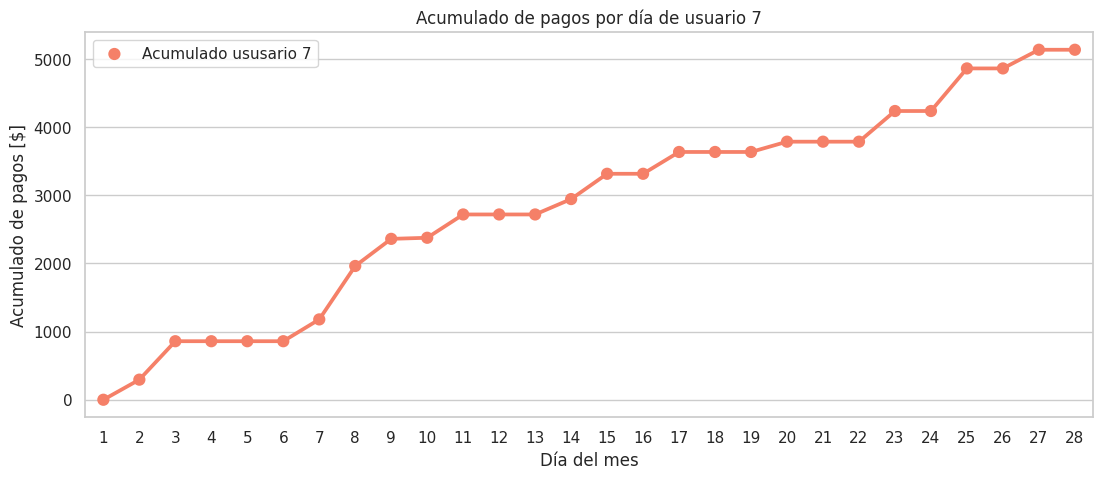

In [ ]:
y = sns.color_palette('Reds_d')
plt.gcf().set_size_inches(13, 5)
sns.pointplot(x='fecha_compra', y='total_gastado', data=data4[data4['id'] == USER_ID], color=y[0], label=f'Acumulado ususario {USER_ID}', markers='o', linestyles='-')
plt.title(f'Acumulado de pagos por día de usuario {USER_ID}')
plt.xlabel('Día del mes')
plt.ylabel('Acumulado de pagos [$]')
plt.legend()
plt.show()

### Pregunta 3.3

```SQL	
SELECT 
  *,  
  AVG(G.costo_total) OVER (
    ORDER BY G.fecha_compra ASC
    ROWS BETWEEN 2 PRECEDING AND 2 FOLLOWING
  ) as media_movil
FROM (
  SELECT DISTINCT
    C.fecha_compra,
    SUM(F.precio_unitario * C.cantidad) OVER (PARTITION BY C.fecha_compra) AS costo_total
  FROM 
    `IIC2440_actividad2.datos_compras` as C
  JOIN `IIC2440_actividad2.datos_frutas` as F ON C.id_producto=F.id) as G
ORDER BY G.fecha_compra
```

In [ ]:
datos5 = pd.read_csv('media_movil.csv')
print(datos5.head())

  fecha_compra  costo_total  media_movil
0   2023-02-01          942      1499.00
1   2023-02-02         1880      1515.75
2   2023-02-03         1675      1561.80
3   2023-02-04         1566      1856.80
4   2023-02-05         1746      1891.20


In [ ]:
datos5['fecha_compra'] = pd.to_datetime(datos5['fecha_compra']).dt.day

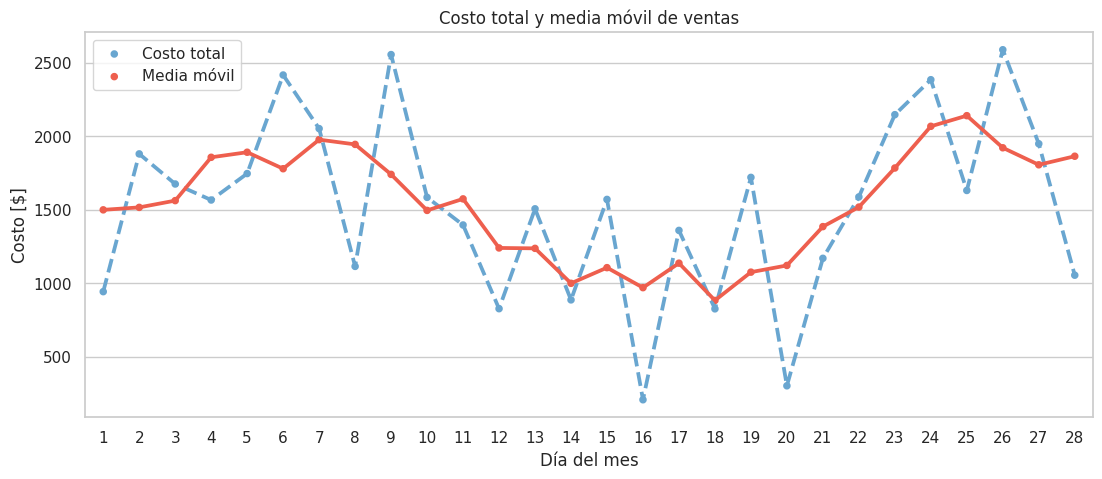

In [ ]:

x = sns.color_palette('Blues_d')
y = sns.color_palette('Reds_d')
plt.gcf().set_size_inches(13, 5)
sns.pointplot(x='fecha_compra', y='costo_total', data=datos5, label='Costo total', linestyles='--', markers='.', color=x[1])
sns.pointplot(x='fecha_compra', y='media_movil', data=datos5, label='Media móvil', linestyles='-', markers='.', color=y[1])
plt.title('Costo total y media móvil de ventas')
plt.xlabel('Día del mes')
plt.ylabel('Costo [$]')
plt.legend()
plt.show()


### Importante

Cuando te pedimos solo escribir la consulta SQL tienes que escribir la consulta en Markdown, sin añadir ningún `.csv`. Cuando te pedimos visualizar **tienes que escribir la consulta en Markdown**, adjuntar el `.csv` y hacer el código para la visualización. 

La parte de adjuntar el `.csv` es solo para poder correr el código Python que arma la visualización, y dicha visualización se debería armar con el `.csv` tal y como está y **no deberías hacer mayor procesamiento con Pandas**. La única parte que requiere un poco de procesamiento es cuando tienes que escoger un usuario en particular para visualizar. Si tienes dudas sobre lo que estás haciendo, deberías preguntarte si tu consulta SQL hace lo que te piden, y si estás usando Window Functions cuando corresponde.

**Sobre la visualización**: esperamos que hagas visualizaciones que se entiendan por si solas y que sean fáciles de explicar para alguien que no tiene contexto del código. Las visualizaciones las debes armar con código Python, y para realizarlas te recomendamos usar [Plotly](https://plotly.com/python/) o [Seaborn](https://seaborn.pydata.org/).

## Detalles administrativos

- El trabajo es individual. Puedes consultar y discutir con tus compañeras y compañeros, pero a la hora de escribir el código, no puedes compartirlo con nadie. Puedes usar recursos como internet y modelos fundacionales de procesamiento de texto, pero nuevamente, no puedes compartir tu código.

- La entrega es el martes 11 de abril a las 20:00 horas. Vas a tener que entregar una carpeta comprimida (.zip) con el notebook y los archivos `.csv` necesarios para correr las visualizaciones. **Para corregir la tarea vamos a usar Google Colab, así que te recomendamos que pruebes que tu tarea corre en ese entorno**.

- Si tienes dudas, aprovéchanos, vamos a estar en la sala para ayudar. Recuerda que la idea en estas actividades es aprender y evaluar al mismo tiempo, ¡está bien si no todo sale a la primera!.